In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.decomposition import PCA


#Much owed to https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [109]:
from sklearn import datasets
from math import sqrt


def plot_digits(data, clim=(0,16)):
    fig, axes = plt.subplots(4, 8, figsize=(30, 12),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        sidelength = int(sqrt(len(data[i])))
        ax.imshow(data[i].reshape(sidelength, sidelength),
                  cmap='binary', interpolation='nearest',
                  clim=clim)
        #data[i].min(), data[i].max()

In [3]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

In [102]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('data/fake*.png'):
    im=Image.open(filename)
    image_list.append(im)


In [29]:
im_array[0].min()

19

IndexError: list index out of range

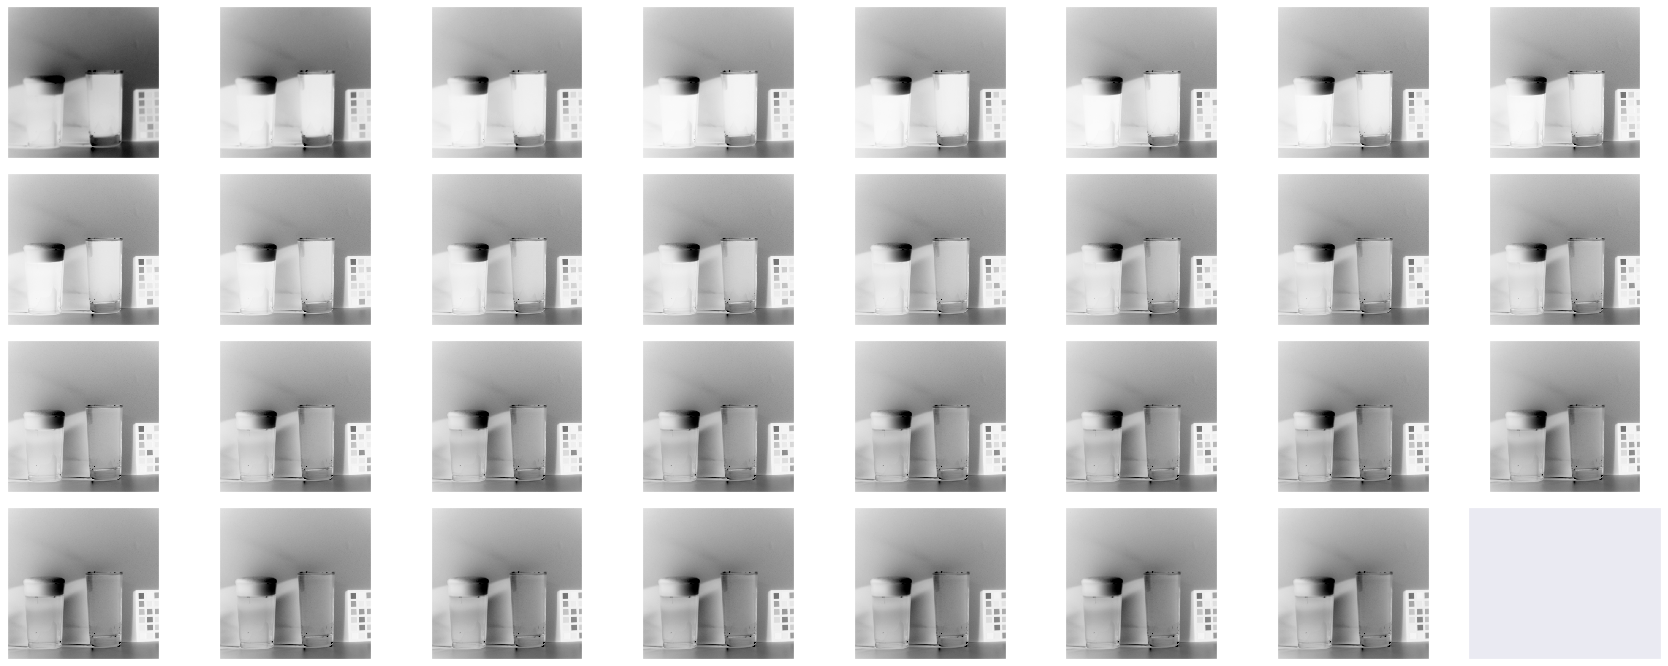

In [94]:
plot_digits(im_array,clim=(0,65536))

In [26]:
im_array[0]

array([ 1274,   122,    70, ..., 14523, 14145, 14310])

IndexError: index 31 is out of bounds for axis 0 with size 31

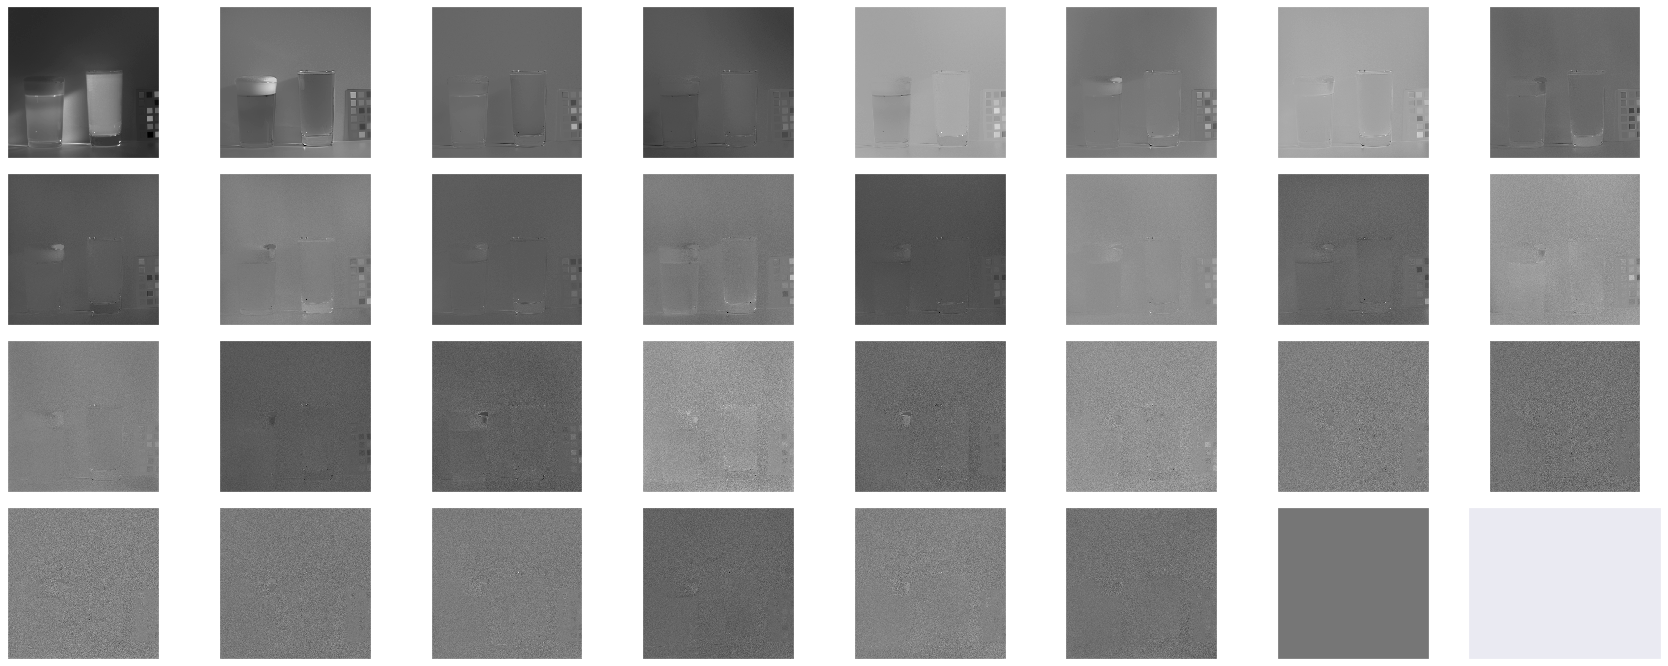

In [95]:
im_array = [np.array(im).flatten() for im in image_list]

pca = PCA().fit(im_array)

plot_digits(pca.components_,clim=(-0.03,0.03))

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


IndexError: index 31 is out of bounds for axis 0 with size 31

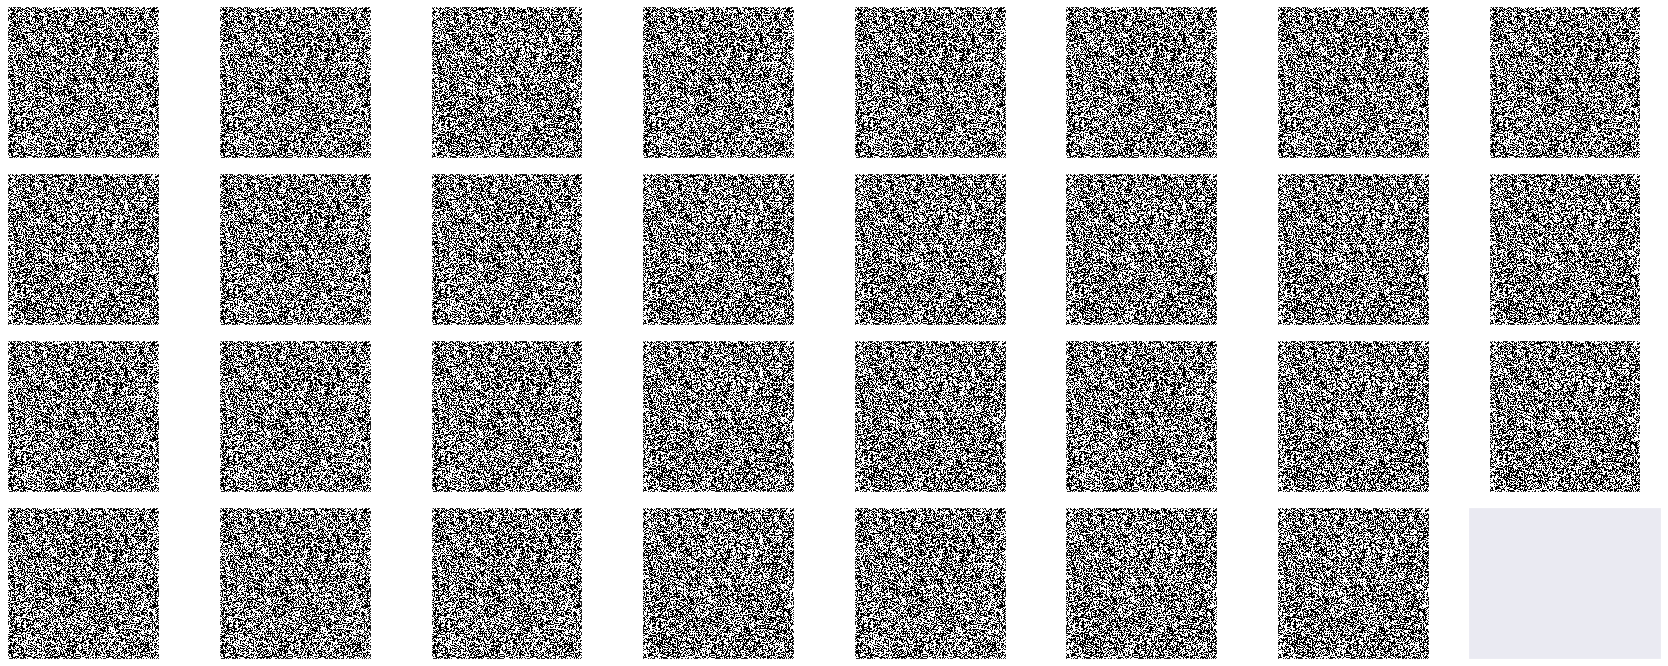

In [114]:
from sklearn.decomposition import FastICA

im_array = [np.array(im).flatten() for im in image_list]

ica = FastICA(whiten=True).fit(im_array)

plot_digits(ica.components_,clim=(-100,100))

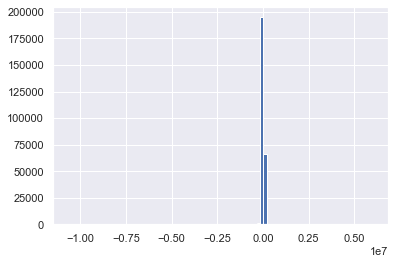

In [115]:
his = plt.hist(ica.components_[0],bins=100)

In [91]:
pca.components_[20].min()

-0.039233094913534036

In [44]:
a = np.array([[1, 2, 0, 0],
[5, 3, 0, 4],
[0, 0, 0, 7],
[9, 3, 0, 0]])

k = np.array([[0,0,0],[-1,1,0],[0,0,0]])

from scipy import ndimage

ndimage.convolve(a, k, mode='constant', cval=0.0)

array([[-1,  2,  0,  0],
       [ 2,  3, -4,  4],
       [ 0,  0, -7,  7],
       [ 6,  3,  0,  0]])

In [46]:
k1 = np.array([[0,0,0],[-1,1,0],[0,0,0]])
k2 = np.array([[0,0,0],[0,1,-1],[0,0,0]])
k3 = np.array([[0,-1,0],[0,1,0],[0,0,0]])
k4 = np.array([[0,0,0],[0,1,0],[0,-1,0]])

In [96]:
spatial_avgs = []

for img in pca.components_:
    sidelength = int(sqrt(len(img)))
    img = img.reshape(sidelength, sidelength)
    ind_avgs = []
    for kernel in (k1, k2, k3, k4):
        ind_avgs.append(ndimage.convolve(img, kernel, mode='constant', cval=0.0))
    spatial_avgs.append(np.mean(ind_avgs, axis=0))

In [97]:
spatial_vect = [img.flatten() for img in spatial_avgs]

In [98]:
spatial_vect[0].max()

0.0013805431633553513

IndexError: list index out of range

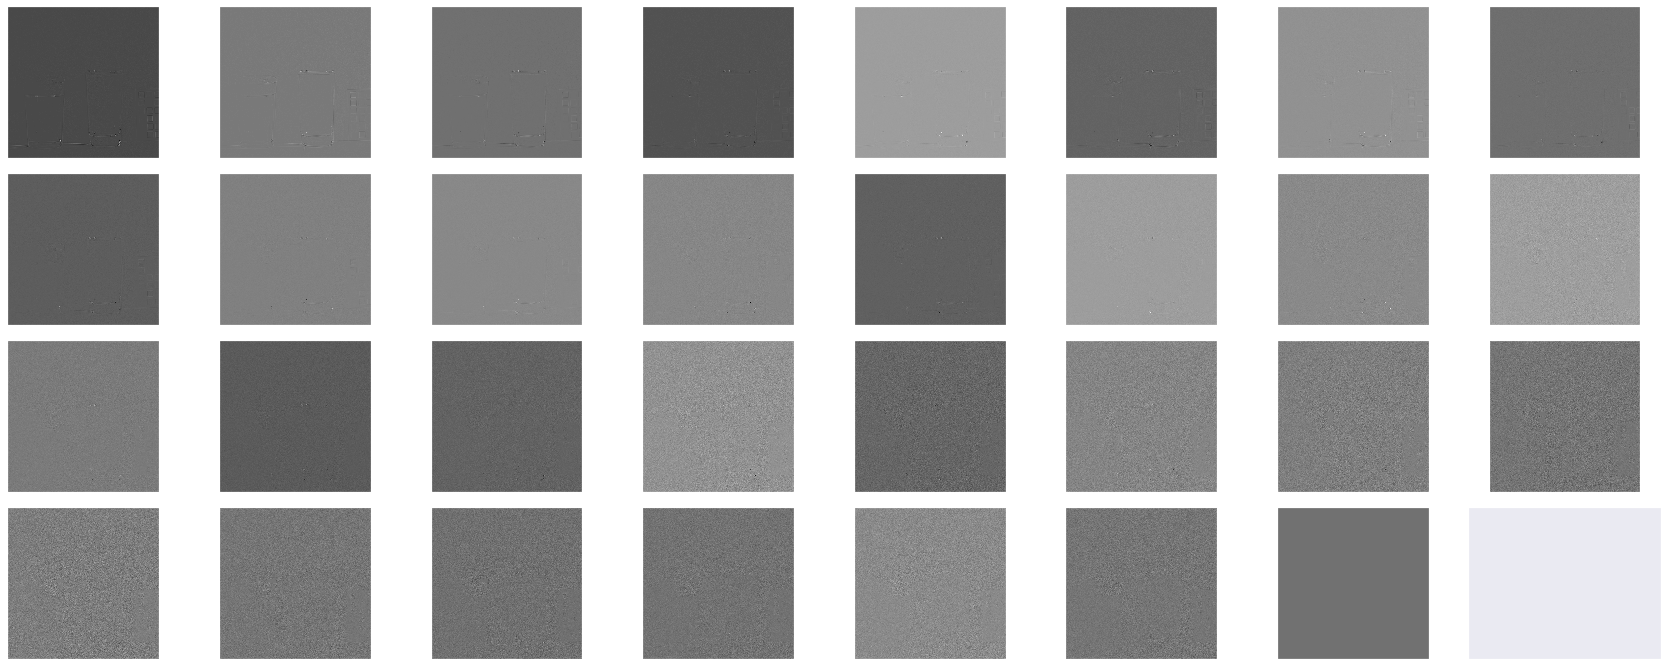

In [99]:
plot_digits(spatial_vect,clim=(-0.005,0.005))

IndexError: index 31 is out of bounds for axis 0 with size 31

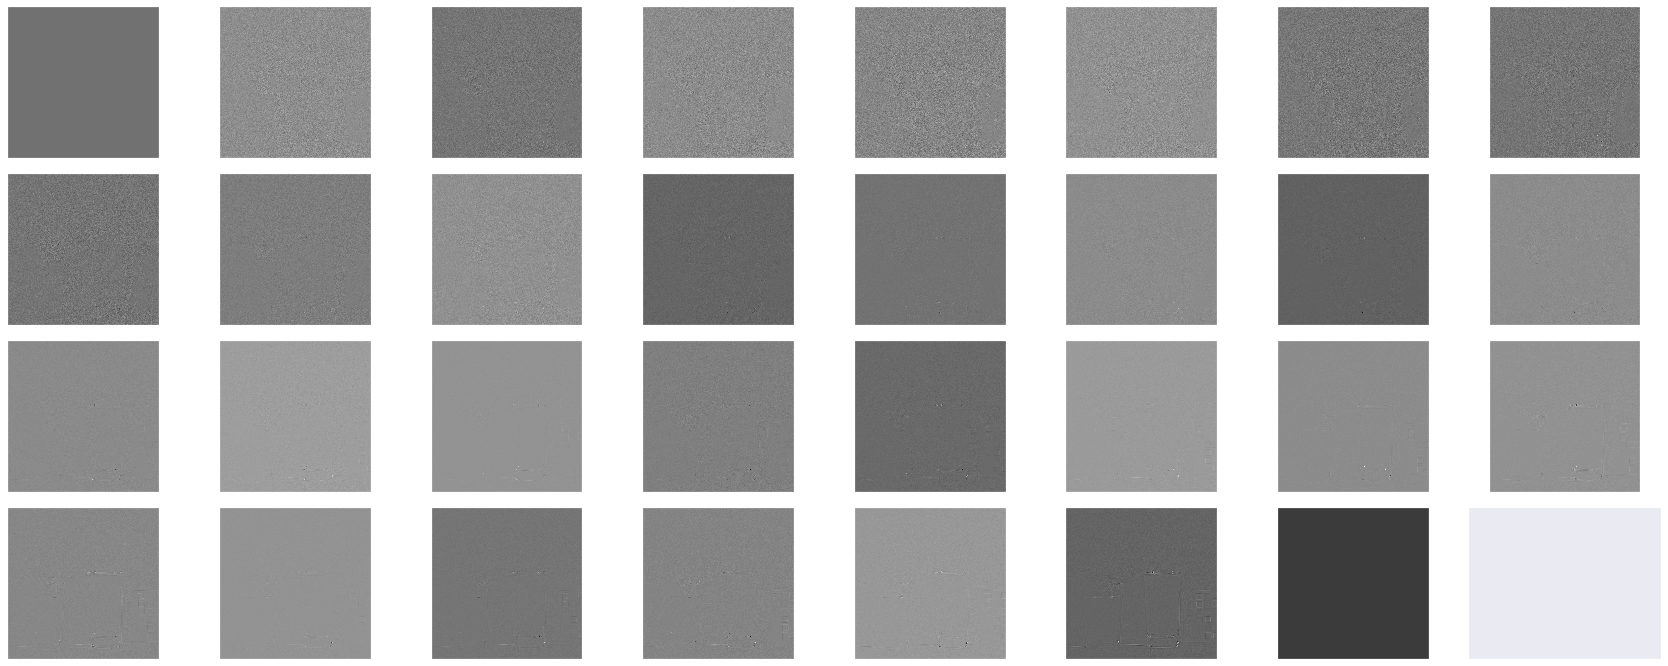

In [100]:
pca = PCA().fit(spatial_vect)

plot_digits(pca.components_,clim=(-0.7,0.5))

In [84]:
pca.components_[0].min()

-0.6829373902978689